<a href="https://colab.research.google.com/github/MUbarak123-56/qiskit-work/blob/master/entanglement2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 101.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136820 sha256=8735a4c911ec548fcdb60a2111e6c8afba77258acf5a752c5e999d24e026aee4
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *

In [4]:
meas_x = QuantumCircuit(1,1)
meas_x.h(0)
meas_x.measure(0,0)

meas_z = QuantumCircuit(1,1)
meas_z.measure(0,0)

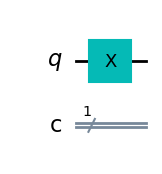

In [5]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.draw("mpl")

In [7]:
backend = Aer.get_backend('qasm_simulator')

In [8]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 1024}
Results from x measurement: {'1': 506, '0': 518}


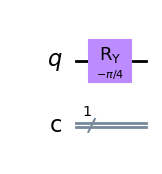

In [11]:
from math import pi
qc = QuantumCircuit(1,1)
qc.ry(-pi/4, 0)
qc.draw("mpl")

In [12]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'0': 887, '1': 137}
Results from x measurement: {'0': 155, '1': 869}


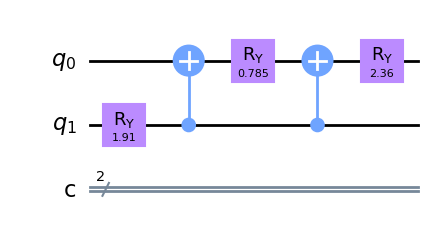

In [13]:
qc_charlie = QuantumCircuit(2,2)
qc_charlie.ry(1.911, 1)
qc_charlie.cx(1,0)
qc_charlie.ry(0.785, 0)
qc_charlie.cx(1,0)
qc_charlie.ry(2.356, 0)
qc_charlie.draw("mpl")

In [14]:
meas_zz = QuantumCircuit(2,2)
meas_zz.measure([0,1], [0,1])

Results for z measurements: 


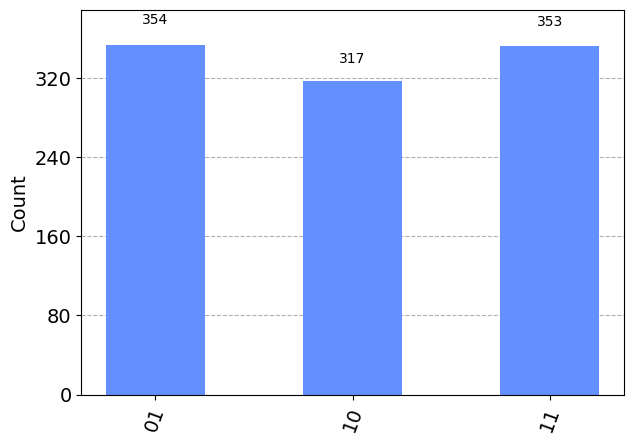

In [15]:
from qiskit.visualization import plot_histogram

print("Results for z measurements: ")
counts = backend.run(qc_charlie.compose(meas_zz)).result().get_counts()

plot_histogram(counts)

In [17]:
meas_zx = QuantumCircuit(2,2)
meas_zx.h(0)
meas_zx.measure([0,1], [0,1])

Results for a z and x measurements: 


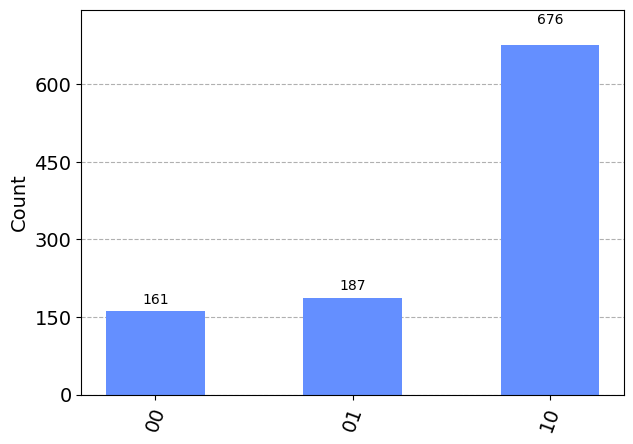

In [18]:
print("Results for a z and x measurements: ")

counts = backend.run(qc_charlie.compose(meas_zx)).result().get_counts()

plot_histogram(counts)

Results for an x and a z measurement:


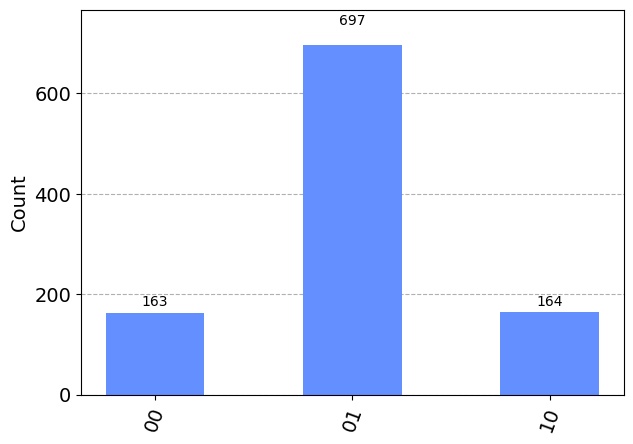

In [19]:
meas_xz = QuantumCircuit(2,2)
meas_xz.h(1)
meas_xz.measure([0,1],[0,1])

print('Results for an x and a z measurement:')
counts = backend.run(qc_charlie.compose(meas_xz)).result().get_counts()
plot_histogram(counts)

Results for an x and an x measurement:


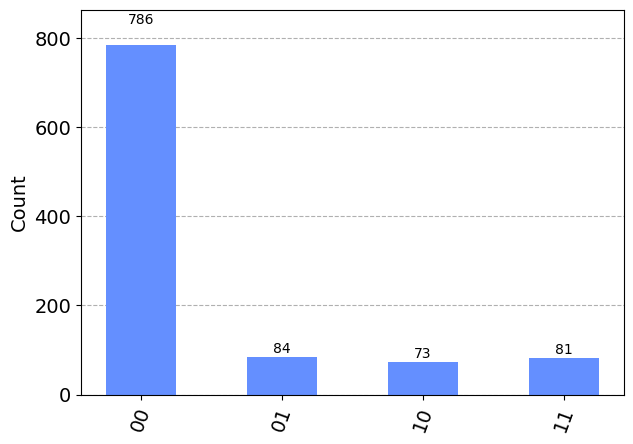

In [20]:
meas_xx = QuantumCircuit(2,2)
meas_xx.h([0,1])
meas_xx.measure([0,1],[0,1])

print('Results for an x and an x measurement:')
counts = backend.run(qc_charlie.compose(meas_xx)).result().get_counts()
plot_histogram(counts)